In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype
from datetime import datetime
from Utilities import T_test
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
df = pd.read_csv('./Data/analysis_data.csv',encoding='utf-16')

### 선행 연구에서 유의미하게 나타났던 Feature
#### Numerical

1.	Duration of project(1-60 days with average 30 days)
2.	The goal amount
3.	The number of images  
4.	The presence of videos
5.	The duration of videos
6.  The number of update 

In [3]:
# http://www.databaser.net/moniwiki/wiki.php/%EC%9D%B4%EC%83%81%EC%B9%98%EC%A0%9C%EA%B1%B0%EB%B0%A9%EB%B2%95
# outlier-제거
def find_outlier_treshold(df,column):
    summary = df[column].describe()
    Q1 = summary['25%']
    Q3 = summary['75%']
    IQR = Q3 - Q1    
    return Q1, Q3, IQR

def check_outlier(value,Q1,Q3,IQR):
    if (value < Q1 - (1.5 * IQR)) or (value > Q3 + (1.5 * IQR)):
        return True
    else:
        return False

def filter_outlier(df,column):
    Q1, Q3, IQR = find_outlier_treshold(df,column)
    value_list = df[column].tolist()
    removed_outlier_list = list(filter(lambda x: check_outlier(x, Q1, Q3, IQR) != True, value_list))
    diff = len(value_list) - len(removed_outlier_list)
    print('Number of filtered value : {0}, Removed number of value : {1}'.format(len(removed_outlier_list),diff))
    
    # column이름
    filtered_df = df[df[column].isin(removed_outlier_list)]
    
#     new_column = 'filtered_' + column
#     removed_outlier_df = pd.DataFrame({new_column : removed_outlier_list})
    return filtered_df

In [4]:
filter_outlier(df,'Project_goal').head()

Number of filtered value : 1180, Removed number of value : 135


,Project_Id,Project_launched_at,Project_deadline,Project_goal,Project_category,Date,Days_to_go,Pledged,Options_number,Title_count,...,diff,Success,backer1,backer2,backer3,ratio1,ratio2,ratio3,Top_category,super_category
0,1000414645,1560292936,1562884936,10000.0,Science Fiction,1.562814e+09,19,20139.0,12.0,35.0,...,2.0,1,13.0,17.0,25.0,37.730000,39.180000,44.940000,Film & Video,Film
1,1002877193,1559689942,1562281942,3000.0,Video Games,1.562213e+09,19,3217.0,9.0,13.0,...,2.0,1,127.0,149.0,153.0,48.733333,56.233333,58.400000,Games,Games
2,1002950518,1559343638,1561935638,500.0,Comics,1.561874e+09,17,1306.0,11.0,47.0,...,2.0,1,15.0,19.0,22.0,77.600000,89.800000,105.800000,Comics,Comics & Illustartion
3,1006560474,1559058077,1561650077,100.0,Product Design,1.561596e+09,15,461.0,3.0,48.0,...,1.0,1,12.0,17.0,18.0,124.000000,173.000000,185.000000,Design,Design & Tech
4,1006860742,1558561181,1561500000,12000.0,Small Batch,1.561423e+09,21,202.0,16.0,54.0,...,1.0,0,2.0,2.0,2.0,0.841667,0.841667,0.841667,Food,Food & Craft


In [5]:
df['Success'] = df['Success'].apply(lambda x : 'Success' if x == 1 else 'Fail')

In [6]:
project_goal = filter_outlier(df,'Project_goal')
project_goal.groupby(['Success'])['Project_goal'].describe()

Number of filtered value : 1180, Removed number of value : 135


,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,527.0,11033.400380,10459.158792,1.0,3000.0,8000.0,15000.0,45000.0
Success,653.0,7699.254211,8795.646863,1.0,1500.0,5000.0,10000.0,45000.0


In [7]:
T_test.T_test(project_goal,'Success','Project_goal')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=19.25201198695268, pvalue=1.2480800043710679e-05)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=-5.947057263660919, pvalue=3.5937893667701076e-09)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

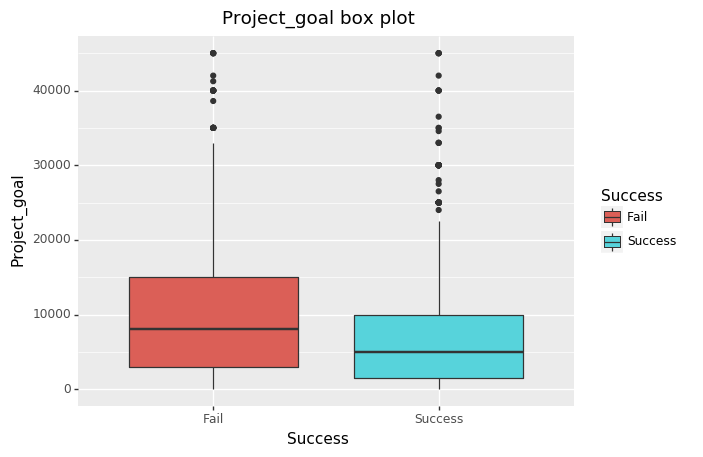

<ggplot: (-9223372036574564387)>

In [8]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
ggplot(project_goal, aes(x='Success', y='Project_goal')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('Project_goal box plot')
#     + facet_wrap('~Success')

<Figure size 432x288 with 0 Axes>

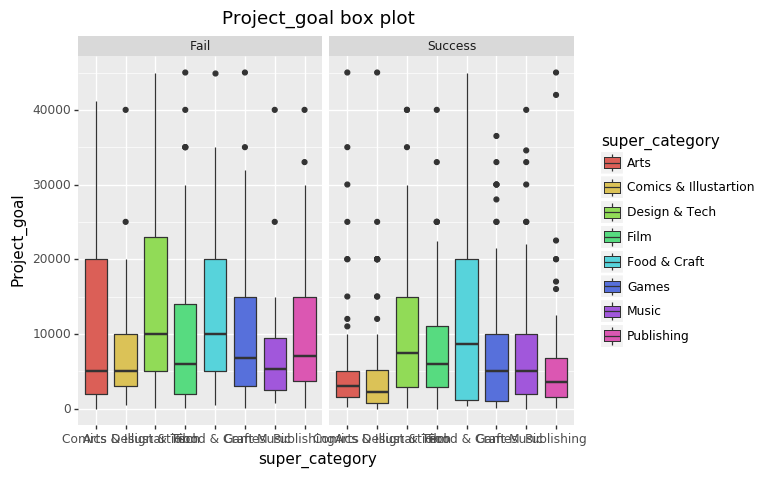

<ggplot: (-9223372036573376291)>

In [9]:
fig = plt.figure()
# graph 객체 생성
ggplot(project_goal, aes(x='super_category', y='Project_goal')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Project_goal box plot') \
    + facet_wrap('~Success')

In [10]:
df.groupby(['Success'])['Content_img_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,12.104101,13.561231,0.0,2.0,8.0,17.0,84.0
Success,681.0,19.226138,19.078136,0.0,5.0,13.0,27.0,129.0


In [11]:
T_test.T_test(df,'Success','Content_img_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=35.820967586405665, pvalue=2.786519577836856e-09)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=7.751596282170466, pvalue=1.8080564002030865e-14)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

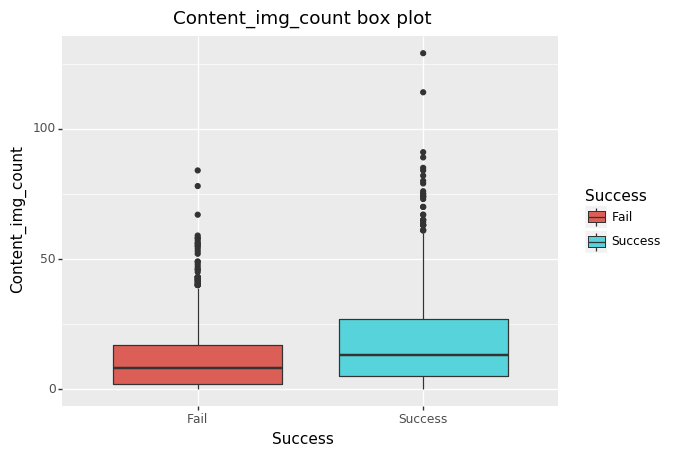

<ggplot: (280537769)>

In [12]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='Success', y='Content_img_count')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('Content_img_count box plot')

<Figure size 432x288 with 0 Axes>

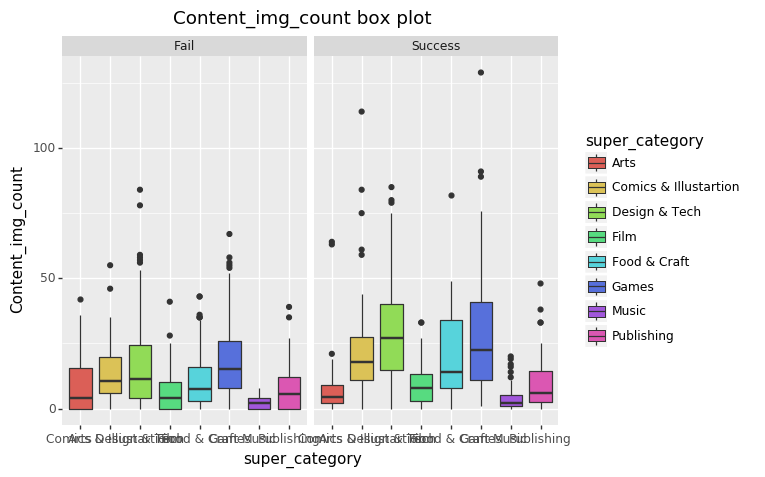

<ggplot: (280540992)>

In [13]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='Content_img_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Content_img_count box plot') \
    + facet_wrap('~Success')

In [14]:
df.groupby(['Success'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,28.946372,6.754576,7.0,30.0,30.0,30.0,51.0
Success,681.0,27.183554,6.532729,7.0,24.0,30.0,30.0,46.0


In [15]:
T_test.T_test(df,'Success','duration')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=3.2626456956122594, pvalue=0.0711035856217752)
=> H0 : 두 집단의 분산은 같다
---------------------------------------------
T-test
Ttest_indResult(statistic=-4.804371446048845, pvalue=1.7329376973810696e-06)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

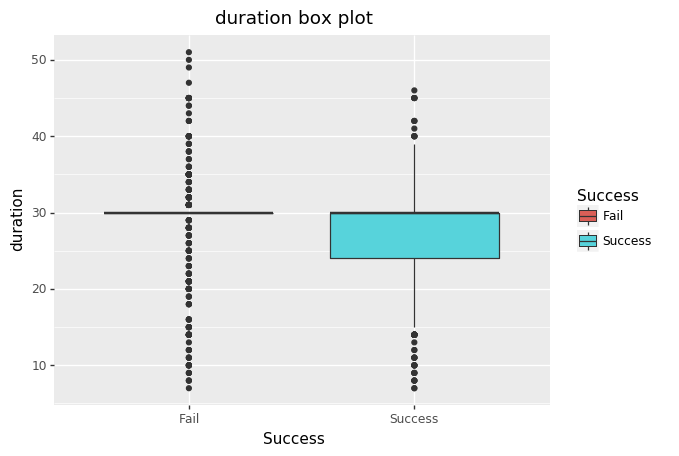

<ggplot: (-9223372036573927273)>

In [16]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='Success', y='duration')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('duration box plot')

<Figure size 432x288 with 0 Axes>

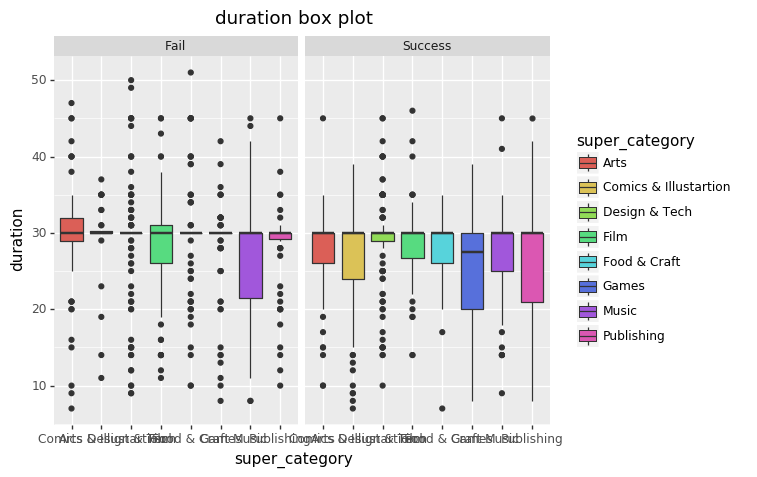

<ggplot: (280858253)>

In [17]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~Success')

#### Textual
1.	Project title
2.	Project description
3.	FAQs 
=>  Converted into numerical values by counting the number of words.

In [18]:
df.groupby(['Success'])['Title_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,33.973186,16.319991,4.0,19.25,34.0,48.0,60.0
Success,681.0,36.980910,15.687985,5.0,23.00,37.0,51.0,60.0


In [19]:
T_test.T_test(df,'Success','Title_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=0.7299638116542553, pvalue=0.39305077352117657)
=> H0 : 두 집단의 분산은 같다
---------------------------------------------
T-test
Ttest_indResult(statistic=3.402313462997299, pvalue=0.000688533164927726)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

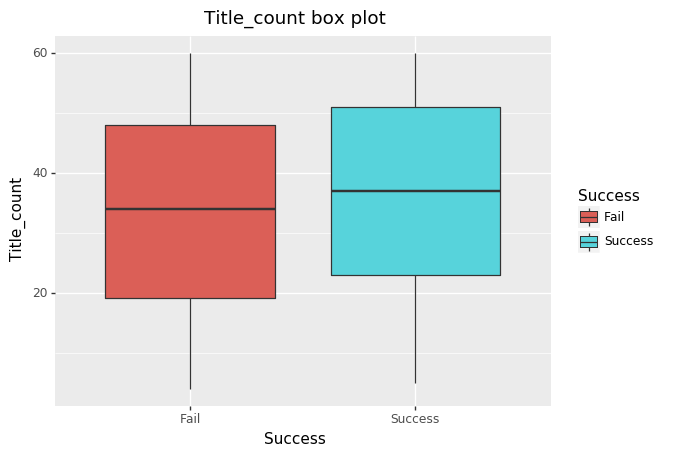

<ggplot: (281716214)>

In [20]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='Success', y='Title_count')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('Title_count box plot')

<Figure size 432x288 with 0 Axes>

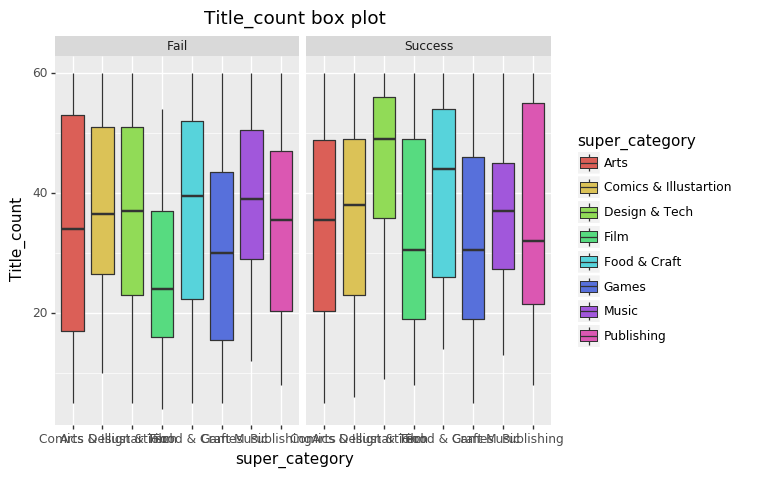

<ggplot: (280992211)>

In [21]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='Title_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Title_count box plot') \
    + facet_wrap('~Success')

In [22]:
df.groupby(['Success'])['Content_text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,5105.157729,3946.078929,368.0,2391.75,3986.0,6668.75,25329.0
Success,681.0,6268.748899,4535.892689,320.0,3178.00,5166.0,7945.00,31855.0


In [23]:
T_test.T_test(df,'Success','Content_text_length')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=6.7480716619151515, pvalue=0.009489879330100355)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=4.94730024080782, pvalue=8.499324947148008e-07)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

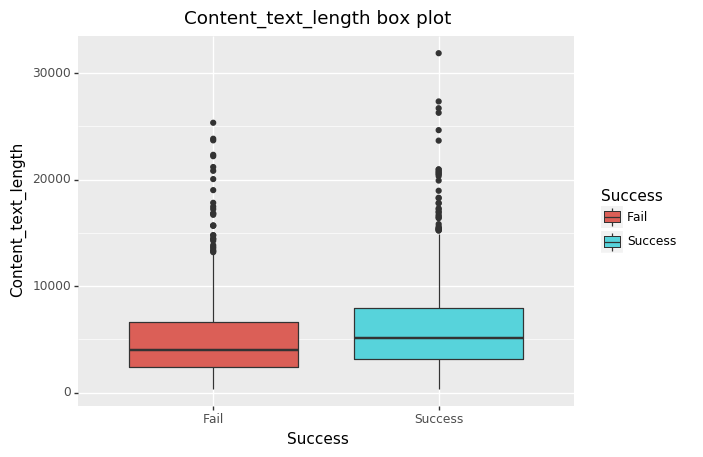

<ggplot: (-9223372036572929781)>

In [24]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='Success', y='Content_text_length')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('Content_text_length box plot')

<Figure size 432x288 with 0 Axes>

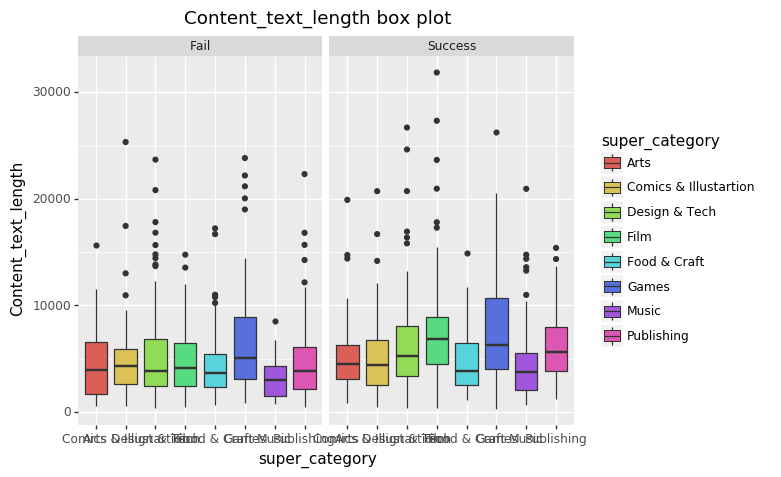

<ggplot: (-9223372036572927642)>

In [25]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='Content_text_length')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Content_text_length box plot') \
    + facet_wrap('~Success')

In [26]:
df.groupby(['Success'])['Update_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,2.070978,3.790277,0.0,0.0,1.0,3.0,39.0
Success,681.0,5.293686,5.688386,0.0,2.0,4.0,7.0,43.0


In [27]:
T_test.T_test(df,'Success','Update_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=67.36610687128513, pvalue=5.331260794401461e-16)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=11.999105708460178, pvalue=1.500161986494735e-31)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

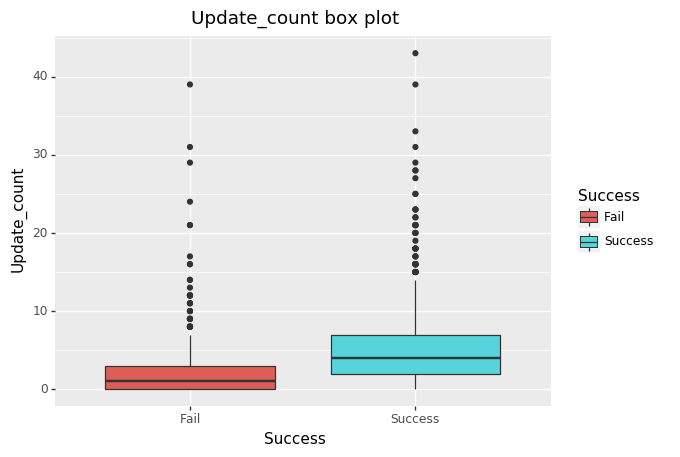

<ggplot: (-9223372036573332245)>

In [28]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='Success', y='Update_count')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('Update_count box plot')

<Figure size 432x288 with 0 Axes>

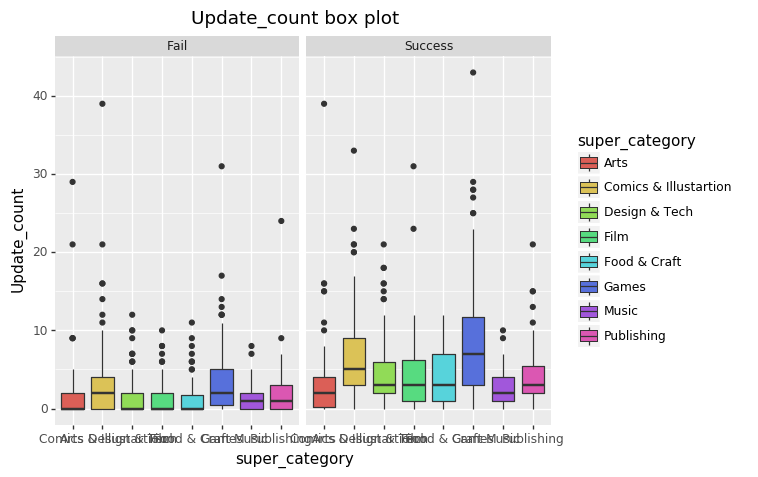

<ggplot: (281447891)>

In [29]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='Update_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Update_count box plot') \
    + facet_wrap('~Success')

#### Categorical
1.	Topic of the project and it's category

<Figure size 72x576 with 0 Axes>

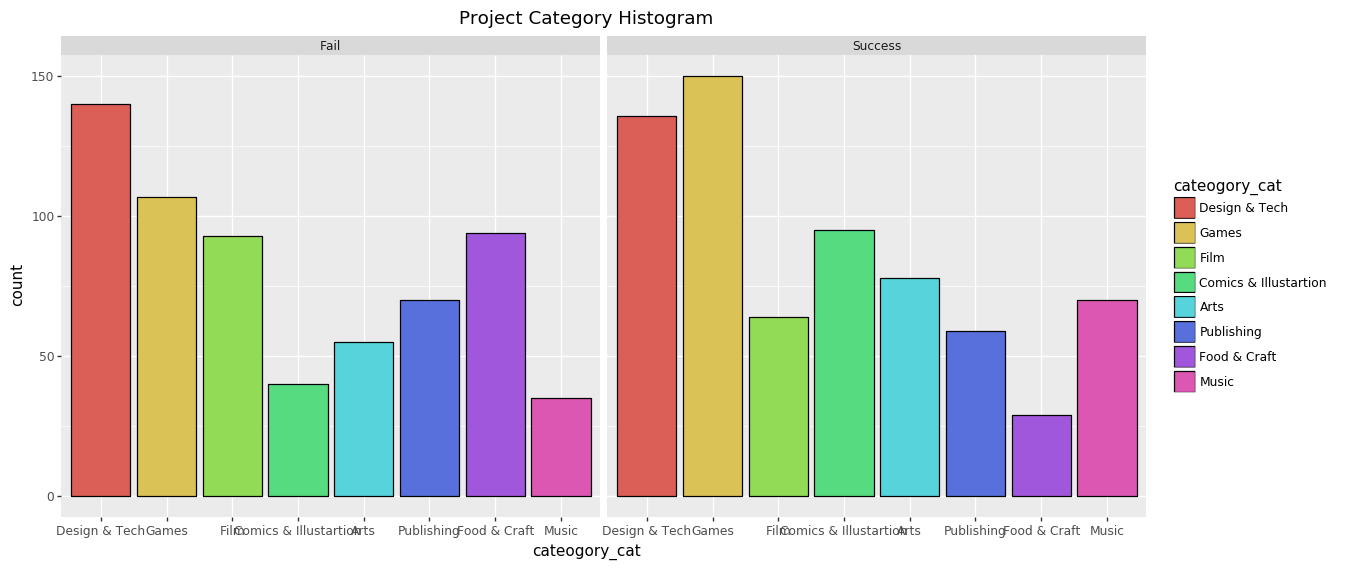

<ggplot: (-9223372036572593969)>

In [30]:
# Determine order and create a categorical type
cateogory_list = df['super_category'].value_counts().index.tolist()
cateogory_cat = CategoricalDtype(categories=cateogory_list, ordered=True)
df['cateogory_cat'] = df['super_category'].astype(str).astype(cateogory_cat)

plt.rcParams['figure.figsize'] = [1, 8]
fig = plt.figure()


# graph 객체 생성
com_plot = ggplot(df, aes('cateogory_cat',fill='cateogory_cat')) \
    + geom_bar(colour="black") \
    + ggtitle('Project Category Histogram') \
    + theme(figure_size=(14, 6))\
    + facet_wrap('~Success')
com_plot

In [31]:
pd.DataFrame(df.groupby(['cateogory_cat','Success'])['cateogory_cat'].count())

cateogory_cat
cateogory_cat         Success               
Design & Tech         Fail               140
                      Success            136
Games                 Fail               107
                      Success            150
Film                  Fail                93
                      Success             64
Comics & Illustartion Fail                40
                      Success             95
Arts                  Fail                55
                      Success             78
Publishing            Fail                70
                      Success             59
Food & Craft          Fail                94
                      Success             29
Music                 Fail                35
                      Success             70

#### From project creators
Number of 
1.	Projects created
2.	Projects backed by the creator


In [32]:
df.groupby(['Success'])['Created_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,1.678233,2.079145,1.0,1.0,1.0,1.0,19.0
Success,681.0,3.343612,5.419952,1.0,1.0,1.0,3.0,51.0


In [33]:
T_test.T_test(df,'Success','Created_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=52.643766079945486, pvalue=6.817308504258061e-13)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=7.255602392630503, pvalue=6.817308504257011e-13)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


<Figure size 72x576 with 0 Axes>

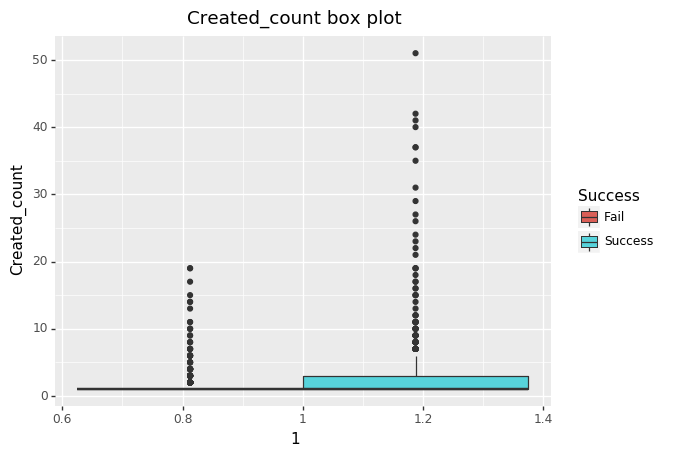

<ggplot: (-9223372036572830439)>

In [34]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x=1, y='Created_count')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('Created_count box plot')

<Figure size 72x576 with 0 Axes>

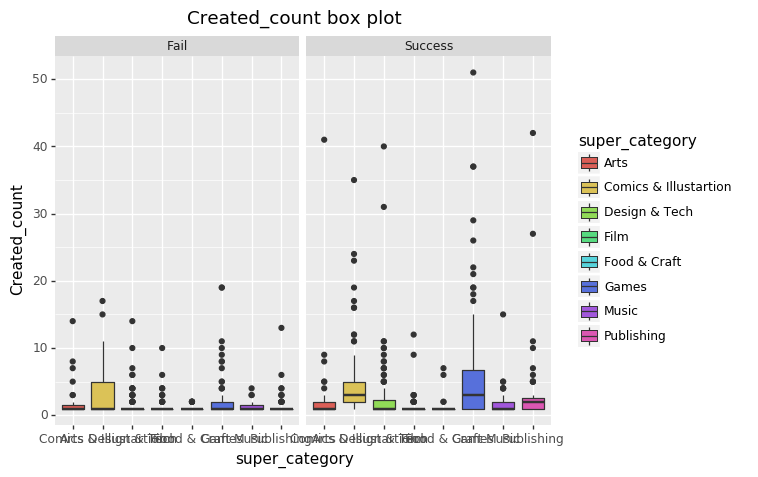

<ggplot: (-9223372036572831551)>

In [35]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='Created_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Created_count box plot') \
    + facet_wrap('~Success')

In [36]:
df['Backed_count'] = df['Backed_count'].apply(lambda x : 0 if x =='None' else x)
df['Backed_count'] = df['Backed_count'].apply(lambda x : float(x))

df.groupby(['Success'])['Backed_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,2.255521,12.591442,0.0,0.0,0.0,0.0,192.0
Success,681.0,7.024963,19.546422,0.0,0.0,0.0,2.0,181.0


In [37]:
T_test.T_test(df,'Success','Backed_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=27.227873702113996, pvalue=2.0996143959591122e-07)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=5.218033509102256, pvalue=2.0996143959588213e-07)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


<Figure size 72x576 with 0 Axes>

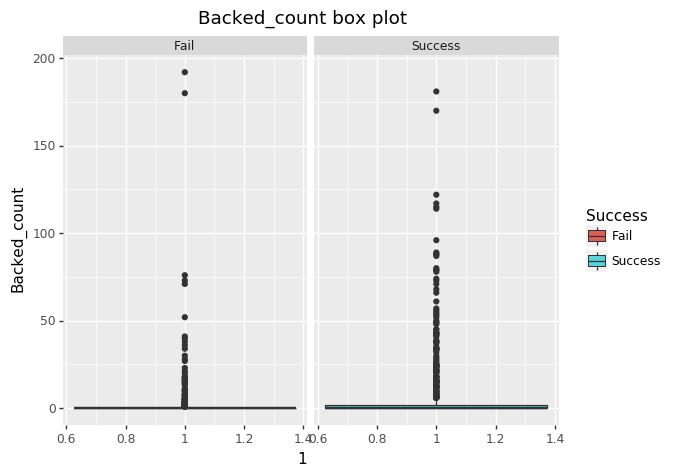

<ggplot: (280803455)>

In [38]:
df['Backed_count'] = df['Backed_count'].apply(lambda x : 0 if x =='None' else x)
df['Backed_count'] = df['Backed_count'].apply(lambda x : float(x))
# outlier 제거
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x=1, y='Backed_count')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('Backed_count box plot') \
    + facet_wrap('~Success')

<Figure size 72x576 with 0 Axes>

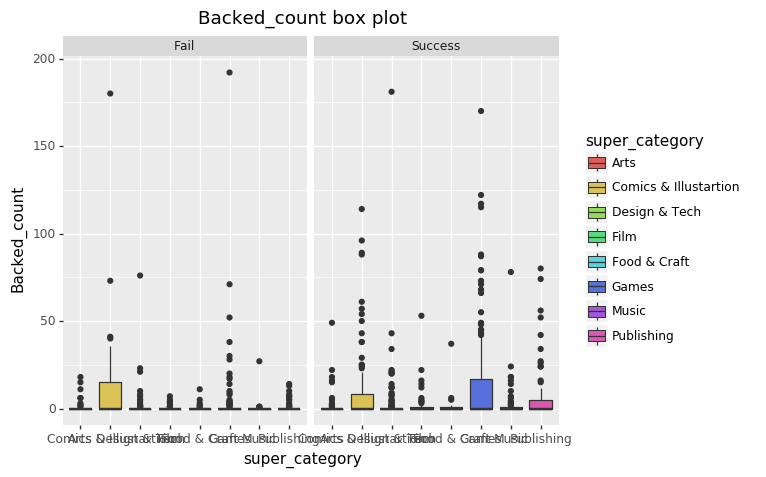

<ggplot: (280803371)>

In [39]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='Backed_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Backed_count box plot') \
    + facet_wrap('~Success')

#### Temporal
The accumulation over the first three days in terms of 
1.	The number of backers
2.	The funding amount

In [40]:
df_1 = df[['Success','backer1']]
df_1['back_variable'] = '1backer'
df_1.rename(columns={'Success':'Success','backer1':'backer','back_variable':'variable'},inplace=True)

df_2 = df[['Success','backer2']]
df_2['back_variable'] = '2backer'
df_2.rename(columns={'Success':'Success','backer2':'backer','back_variable':'variable'},inplace=True)

df_3 = df[['Success','backer3']]
df_3['back_variable'] = '3backer'
df_3.rename(columns={'Success':'Success','backer3':'backer','back_variable':'variable'},inplace=True)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [41]:
back_concat_df = pd.concat([df_1,df_2,df_3])

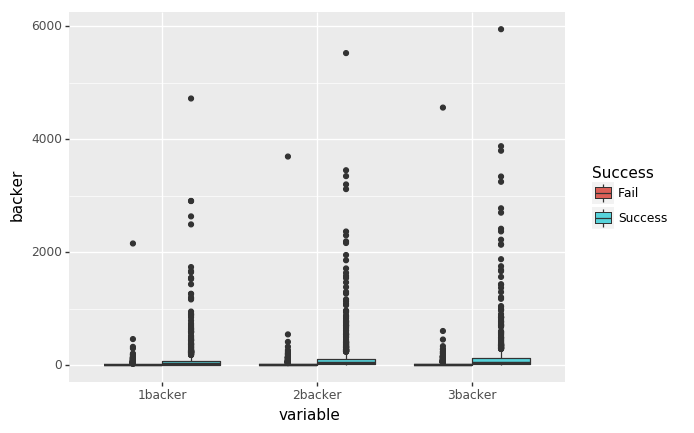

<ggplot: (281019926)>

In [42]:
ggplot(back_concat_df, aes(x='variable',y='backer')) \
    + geom_boxplot(aes(fill='Success'))

In [43]:
df_1 = df[['Success','ratio1']]
df_1['variable'] = '1day'
df_1.rename(columns={'Success':'Success','ratio1':'ratio','variable':'variable'},inplace=True)

df_2 = df[['Success','ratio2']]
df_2['variable'] = '2day'
df_2.rename(columns={'Success':'Success','ratio2':'ratio','variable':'variable'},inplace=True)

df_3 = df[['Success','ratio3']]
df_3['variable'] = '3day'
df_3.rename(columns={'Success':'Success','ratio3':'ratio','variable':'variable'},inplace=True)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [44]:
filter_df1 = filter_outlier(df_1,'ratio')
filter_df2 = filter_outlier(df_2,'ratio')
filter_df3 = filter_outlier(df_3,'ratio')

Number of filtered value : 1154, Removed number of value : 161
Number of filtered value : 1148, Removed number of value : 167
Number of filtered value : 1149, Removed number of value : 166


In [45]:
concat_df = pd.concat([filter_df1,filter_df2,filter_df3])

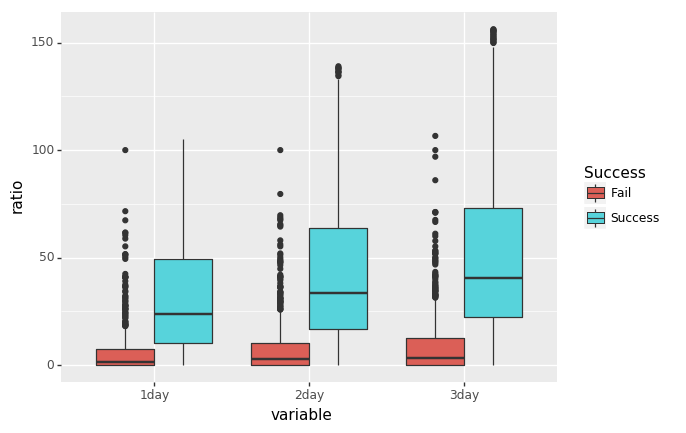

<ggplot: (-9223372036573485098)>

In [46]:
ggplot(concat_df, aes(x='variable',y='ratio')) \
    + geom_boxplot(aes(fill='Success'))